In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

# Load the dataset

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [4]:
# column names
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
#to check rows and columns
df.shape

(400, 5)

In [6]:
# abstract summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [11]:
#remove User_id column
df.drop(columns='User ID',inplace=True)

In [12]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0
...,...,...,...,...
395,Female,46.0,41000.0,1
396,Male,51.0,23000.0,1
397,Female,50.0,20000.0,1
398,Male,36.0,33000.0,0


In [30]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [33]:
df.Gender = df.Gender.map({'Male':0,'Female':1})

In [34]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19.0,19000.0,0
1,0,35.0,20000.0,0
2,1,26.0,43000.0,0
3,1,27.0,57000.0,0
4,0,19.0,76000.0,0
...,...,...,...,...
395,1,46.0,41000.0,1
396,0,51.0,23000.0,1
397,1,50.0,20000.0,1
398,0,36.0,33000.0,0


In [35]:
#Seperate input and output data
X = df.iloc[:,:3]

In [36]:
X[:3]

,Gender,Age,EstimatedSalary
0,0,19.0,19000.0
1,0,35.0,20000.0
2,1,26.0,43000.0


In [37]:
y = df.Purchased
y[:3]

0    0
1    0
2    0
Name: Purchased, dtype: int64

In [ ]:
# Dataset availability????
# .csv [complete]
# train.csv test.csv
# url
# database link
#etc

In [19]:
len(X)

400

# Split the data into training and testing 

In [20]:
from sklearn.model_selection import train_test_split

In [38]:
# 80(training)-20(testing) strategy

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [39]:
len(X_train)

320

In [40]:
len(X_test)

80

In [ ]:
# now we have X_train,y_train for training
# X_test, y_test for testing

# Call the algorithm

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

# Training

In [41]:
model.fit(X_train,y_train)

LogisticRegression()

# Testing

In [42]:
# X_test: Actual testing data
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
y.unique()

array([0, 1], dtype=int64)

In [44]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:ylabel='Purchased'>

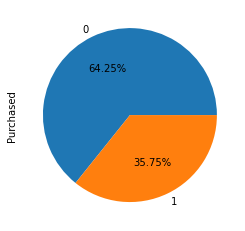

In [45]:
y.value_counts().plot(kind='pie',autopct = '%.2f%%')

In [46]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19.0,19000.0,0
1,0,35.0,20000.0,0
2,1,26.0,43000.0,0
3,1,27.0,57000.0,0
4,0,19.0,76000.0,0
...,...,...,...,...
395,1,46.0,41000.0,1
396,0,51.0,23000.0,1
397,1,50.0,20000.0,1
398,0,36.0,33000.0,0


In [47]:
#check accuracy of current model for trainig and test data
model.score(X_train,y_train)*100

64.375

In [48]:
model.score(X_test,y_test)*100

63.74999999999999

### After loooking at above conclusions we are going to perform Sacaling over the data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()

In [51]:
sc

StandardScaler()

In [53]:
X[:3]

,Gender,Age,EstimatedSalary
0,0,19.0,19000.0
1,0,35.0,20000.0
2,1,26.0,43000.0


In [57]:
#after conversion
X_train_n = sc.fit_transform(X_train)

In [58]:
# train again using new data
model.fit(X_train_n,y_train)

LogisticRegression()

In [59]:
#after scalling chech accuracy of train and test data
model.score(X_train_n,y_train)*100

85.0

In [61]:
#predict
y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test,y_pred)

array([[ 0, 51],
       [ 0, 29]], dtype=int64)

In [64]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [66]:
#actual output
y_test.value_counts()

0    51
1    29
Name: Purchased, dtype: int64

In [70]:
#predicted
pd.Series(y_pred).value_counts()

1    80
dtype: int64

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

36.25

In [73]:
from sklearn.metrics import precision_score

In [75]:
precision_score(y_test,y_pred)

0.3625

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.36      1.00      0.53        29

    accuracy                           0.36        80
   macro avg       0.18      0.50      0.27        80
weighted avg       0.13      0.36      0.19        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


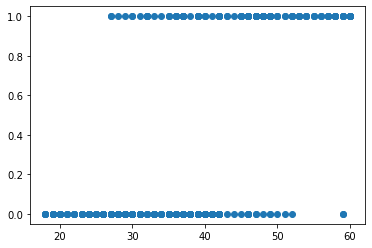

In [80]:
import matplotlib.pyplot as plt
plt.scatter(df.Age,df.Purchased)